In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
#RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data = pd.read_csv('./Concrete_Data.csv')

In [3]:
data.head()


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.shape

(1030, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
data.isnull().mean()*100

cement              0.0
slag                0.0
flyash              0.0
water               0.0
superplasticizer    0.0
coarseaggregate     0.0
fineaggregate       0.0
age                 0.0
csMPa               0.0
dtype: float64

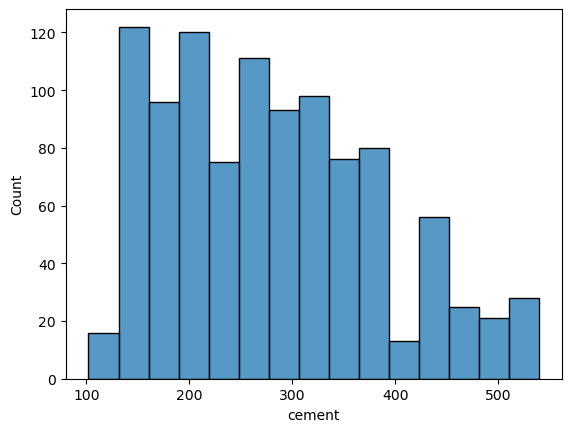

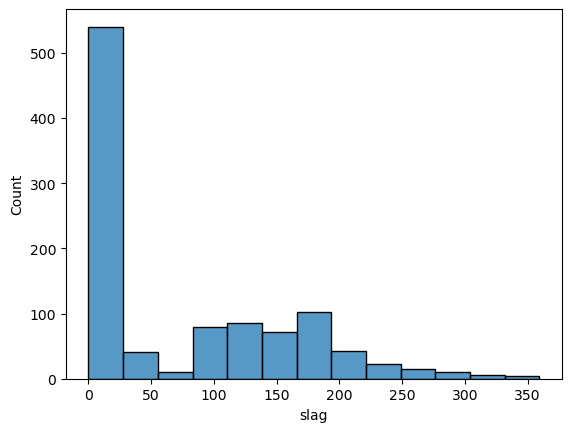

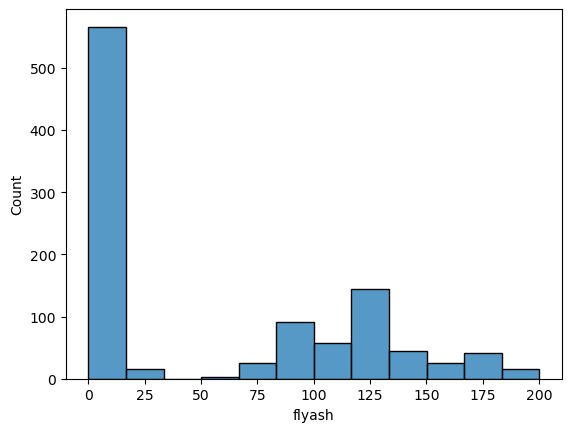

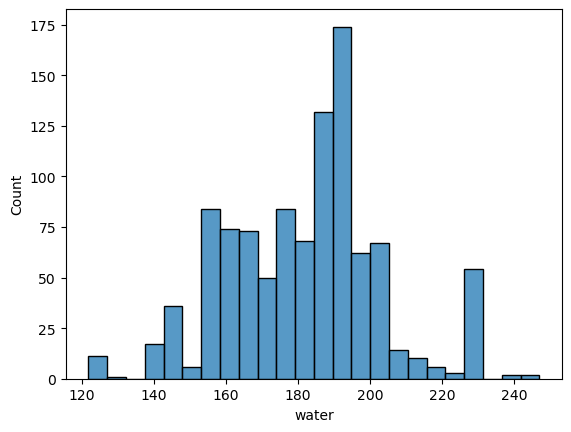

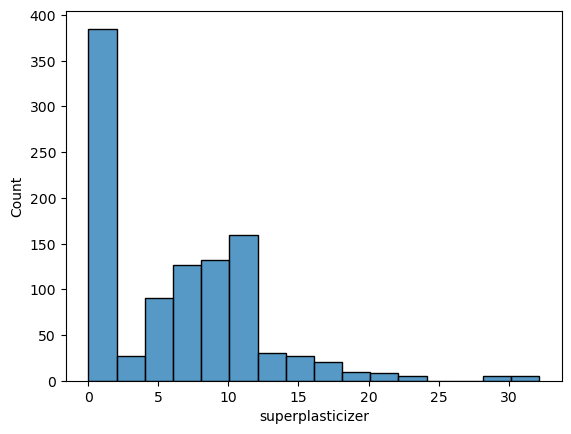

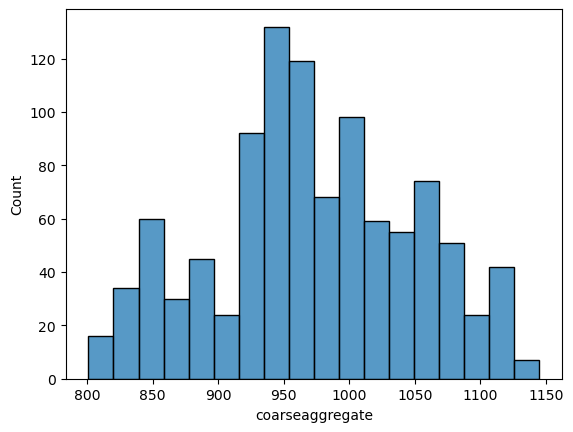

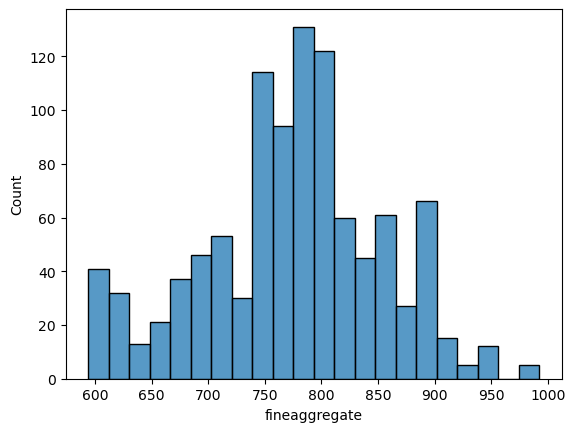

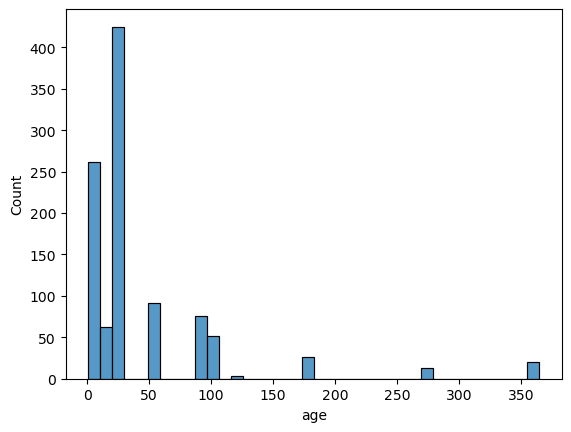

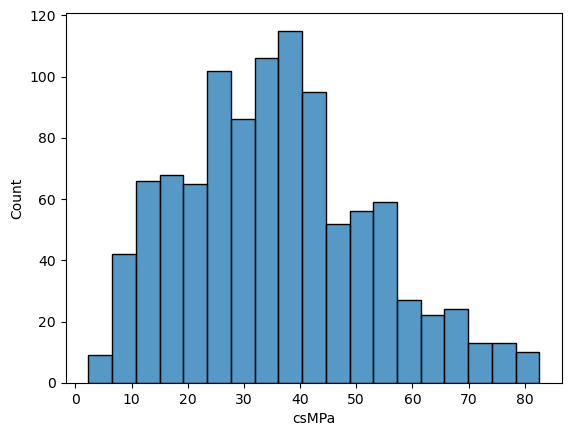

In [8]:
for i in data.columns:
 sns.histplot(x=data[i])
 plt.show();


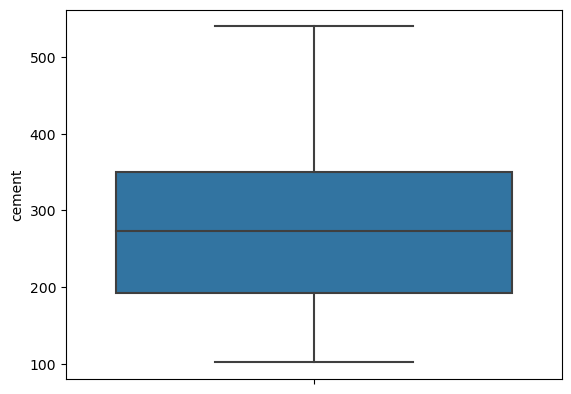

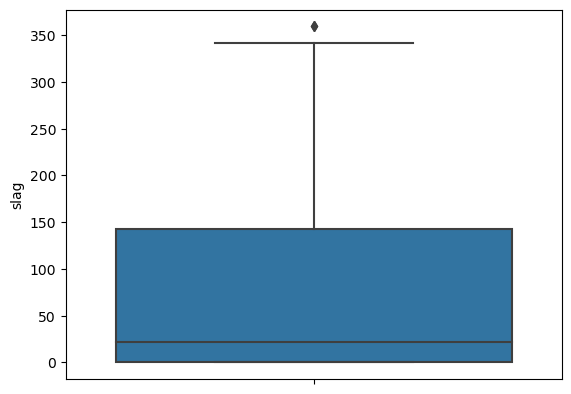

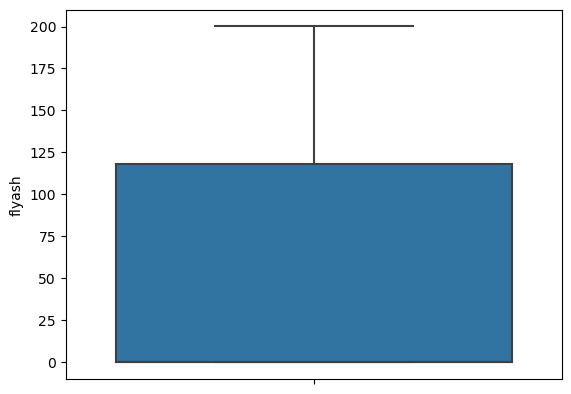

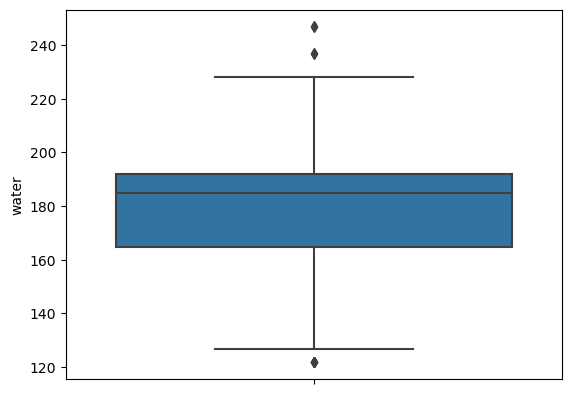

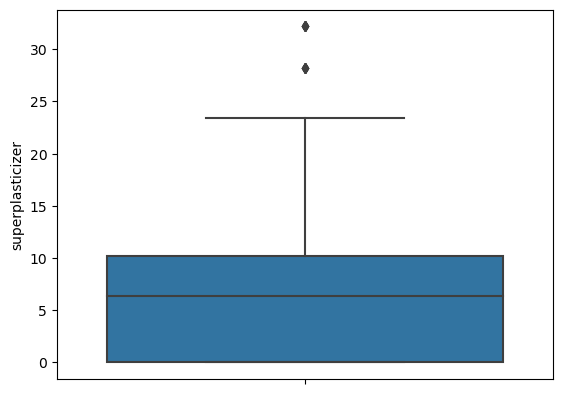

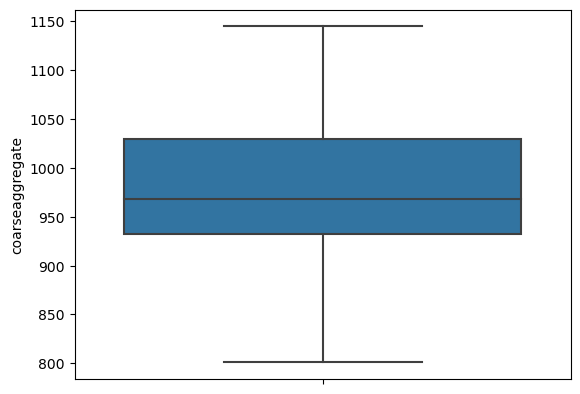

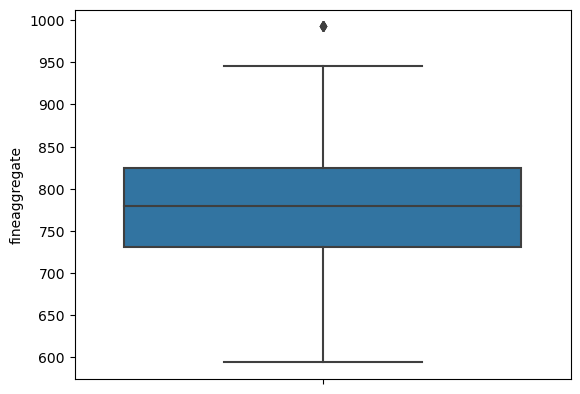

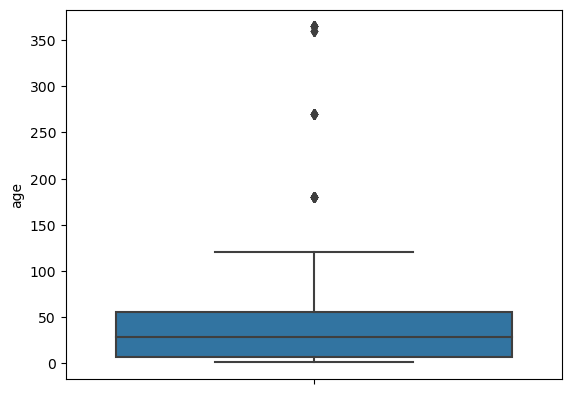

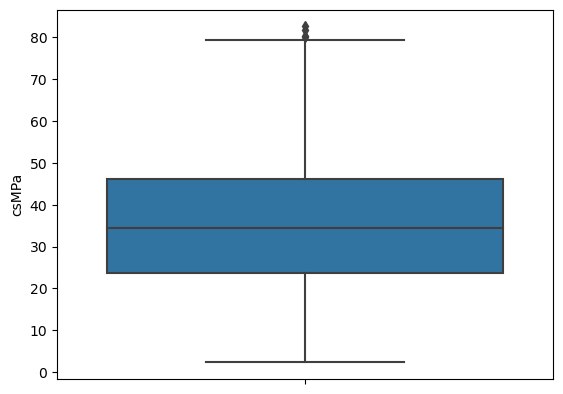

In [9]:
for i in data.columns:
 sns.boxplot(y=data[i])
 plt.show();

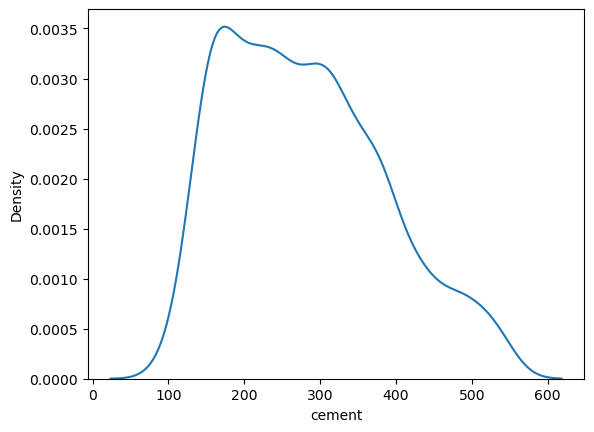

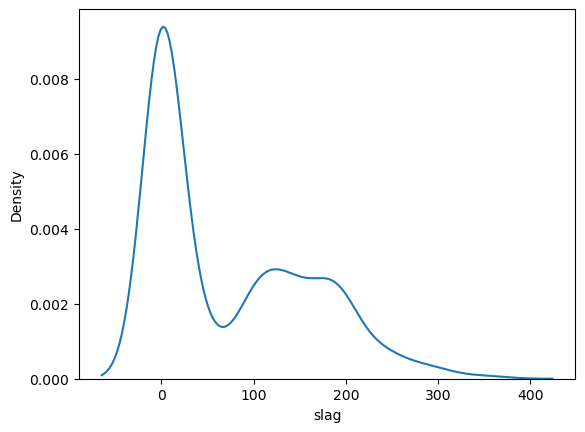

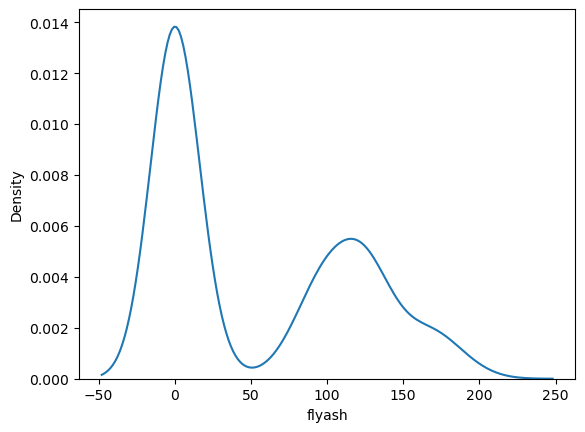

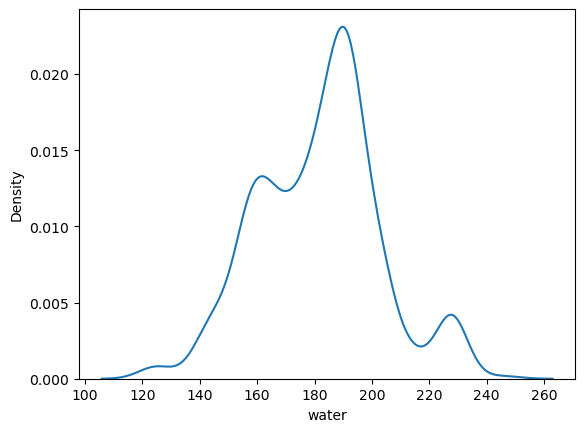

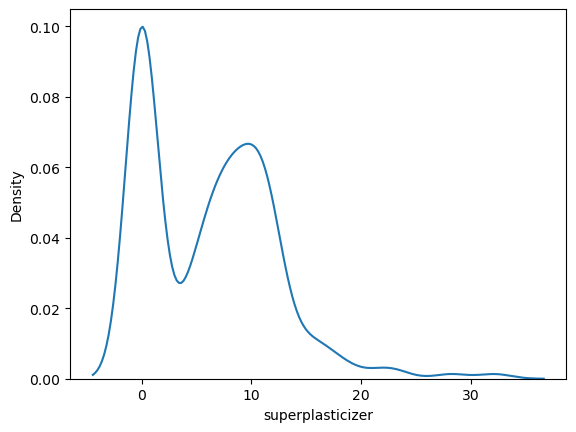

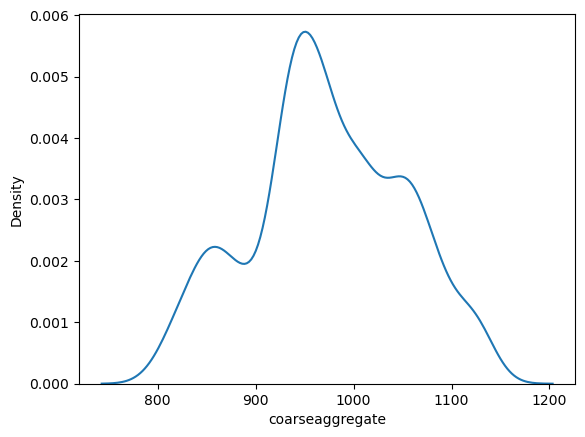

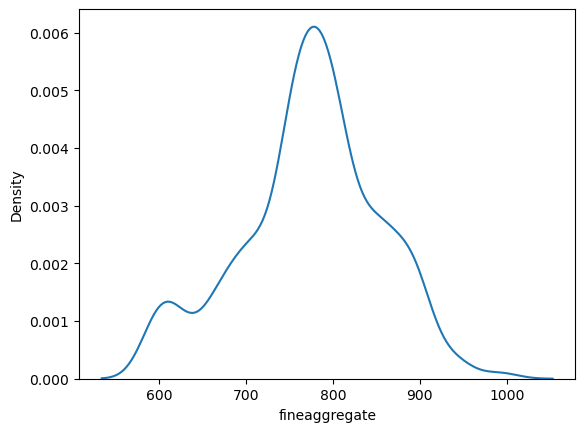

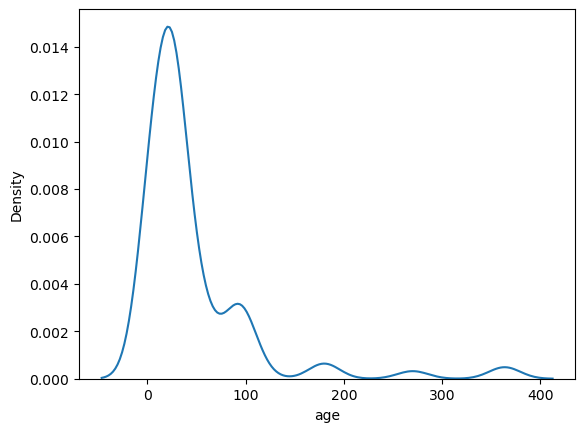

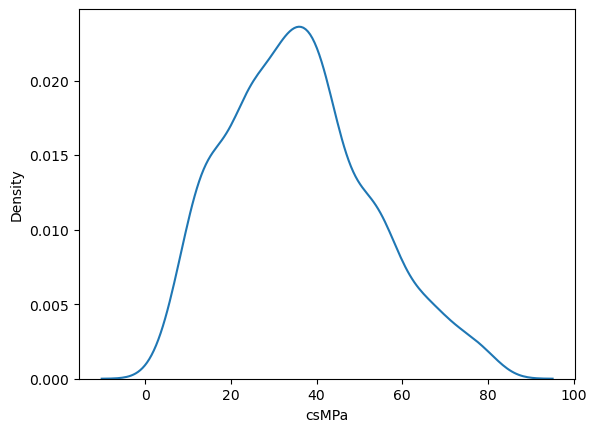

In [10]:
for i in data.columns:
 sns.kdeplot(x=data[i])
 plt.show();

In [11]:
#Correlation

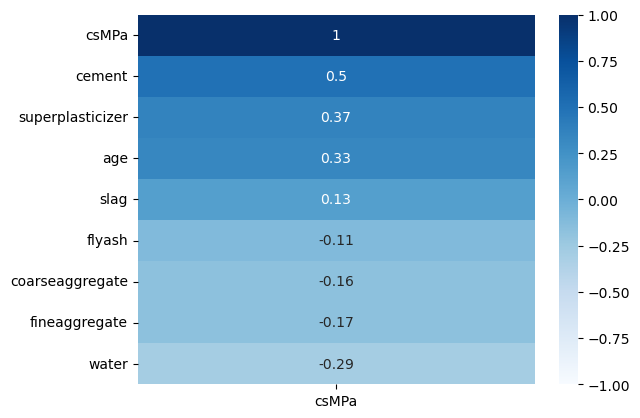

In [12]:
sns.heatmap(data.corr()[["csMPa"]].sort_values(by="csMPa", ascending=False),
 vmin=-1, vmax=1,annot=True, cmap="Blues");

In [13]:
#Splitting the data into x & y


In [14]:
x = data.iloc[:,:-1].values #multiple columns to x.

In [15]:
x.shape #multiple columns to x.

(1030, 8)

In [16]:
x

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [17]:
data.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [18]:
y = data.iloc[:, -1].values #last column, ie only one column

In [19]:
y.shape

(1030,)

In [20]:
y

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

In [21]:
sc = StandardScaler()

In [22]:
x = sc.fit_transform(x)

In [23]:
#Splitting the data into training and testing data


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=52, shuffle=True)
#random_state=32, shuffle=True)

In [25]:
x_train.shape

(824, 8)

In [26]:
x_test.shape


(206, 8)

In [27]:
y_test.shape

(206,)

In [28]:
y_train.shape

(824,)

In [29]:
y_test

array([48.85, 55.6 , 25.46, 24.39, 36.56, 29.93, 31.97, 13.12, 21.6 ,
       56.83, 32.33, 26.31, 15.05, 42.29, 43.7 , 33.49, 52.12, 31.65,
        9.85, 63.14, 43.7 , 33.8 , 60.28, 36.45, 32.92, 55.9 , 66.1 ,
        7.84,  7.51, 20.28, 13.46, 25.45, 28.47, 39.7 , 21.02, 14.99,
       58.61, 13.54, 15.57, 34.56, 39.3 , 27.42, 74.19, 49.97, 44.13,
       29.55, 39.64, 11.98, 44.3 , 53.66, 22.9 , 17.57, 14.31, 59.  ,
       26.15, 41.84, 60.2 , 25.89, 30.39, 20.97, 45.84, 41.05, 12.18,
       32.72, 60.95, 42.03, 23.79, 17.2 , 38.07, 12.46, 24.  , 31.25,
       32.72, 12.64, 13.52, 27.23, 11.41, 31.54, 56.7 , 79.3 , 10.73,
       46.8 , 24.1 , 29.59, 33.42, 54.77, 30.57, 33.7 , 74.5 , 14.84,
       28.68, 59.8 , 44.4 , 17.24, 41.24, 39.66, 22.84, 18.28, 15.04,
       43.57, 14.4 , 29.87, 53.46, 69.84, 50.46, 25.61, 30.12, 15.03,
       67.7 , 36.96, 14.94,  7.4 , 53.58, 28.02, 22.75, 12.73, 33.96,
       38.77, 50.73, 61.86, 55.55, 37.72, 18.2 , 48.99,  2.33, 33.31,
       20.59, 25.69,

In [30]:
y_train

array([39.42, 47.82, 12.47, 42.13, 39.06, 21.97, 59.3 , 64.3 , 11.58,
       37.81, 55.26, 49.2 , 42.55, 56.34, 32.84, 33.66, 17.37, 19.01,
       77.3 , 30.65, 55.94, 23.84, 39.84, 65.91, 26.86, 36.45, 39.23,
       66.9 , 33.21, 40.68, 45.37, 27.22, 73.3 , 51.02, 32.96, 32.1 ,
       54.32, 33.4 , 28.94, 19.77, 29.07, 24.45, 38.46, 17.22, 29.45,
       36.99, 39.4 , 46.24,  6.88, 33.12, 36.94, 24.1 , 29.41, 35.36,
       56.4 , 26.2 , 49.19, 79.4 , 17.54, 36.8 , 40.93, 33.36, 17.96,
        9.73, 61.8 , 40.86, 41.93, 39.6 , 38.63, 45.71, 26.06, 40.66,
       22.35, 58.78, 31.42, 15.34, 23.52, 26.26, 42.64, 69.66, 44.61,
       42.64, 51.43, 53.1 , 15.09, 64.9 , 43.39, 74.17, 44.42, 66.95,
       43.8 , 43.38, 41.54, 23.69, 50.24, 31.18, 44.21, 27.66, 18.75,
       45.37, 23.4 , 44.03, 36.44, 56.85, 33.94, 32.07, 38.02, 21.54,
       61.07, 43.94, 39.  , 55.64, 77.3 ,  9.87, 44.14, 60.29, 44.52,
       19.2 , 39.61, 52.2 , 27.83, 34.77, 25.72, 44.86, 21.86, 26.77,
       23.25, 45.9 ,

In [31]:
x_test

array([[ 1.07061865, -0.85688789, -0.84714393, ..., -0.41585837,
         0.14998698,  0.7022236 ],
       [ 1.85564103,  0.52070389, -0.84714393, ..., -1.55461708,
         0.09882463, -0.61233136],
       [-1.71525345,  0.91728334, -0.84714393, ..., -1.10554726,
         2.10164355,  0.7022236 ],
       ...,
       [-0.94937796, -0.33275364,  1.06012139, ...,  1.11278045,
         0.08884173, -0.6756834 ],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  5.05767679],
       [-0.143294  ,  0.4453306 ,  0.52077177, ..., -0.81345887,
        -0.3628844 , -0.27973311]])

In [32]:
x_train

array([[-0.14520869,  0.44185183,  0.51295511, ..., -0.80959867,
        -0.35664509, -0.27973311],
       [-0.66217465, -0.85688789,  1.10389469, ...,  1.44733103,
         0.32343984,  0.86060372],
       [-0.6612173 , -0.85688789,  1.05386806, ...,  1.08961925,
         0.07137166, -0.6756834 ],
       ...,
       [ 1.15486495,  0.24124293, -0.84714393, ..., -0.33608092,
         0.97981538,  0.16373121],
       [ 0.13242117, -0.85688789, -0.84714393, ...,  1.23630682,
        -0.05715815, -0.27973311],
       [ 0.71544389, -0.85688789,  1.3665345 , ..., -2.20699071,
         0.0601409 , -0.27973311]])

In [33]:
#Model building

In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train, y_train)

LinearRegression()

In [36]:
#Predicting


In [37]:
y_pred = model.predict(x_test)

In [38]:
# Visualizing the results

In [39]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred),
 columns=['ACTUAL', 'PREDICTION'],
 dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTION
0,48.85,38.204313
1,55.60,53.576208
2,25.46,21.334238
3,24.39,37.219011
4,36.56,27.622668


In [40]:
OUTPUT.shape

(206, 2)

In [41]:
y_test.shape

(206,)

In [42]:
y_test

array([48.85, 55.6 , 25.46, 24.39, 36.56, 29.93, 31.97, 13.12, 21.6 ,
       56.83, 32.33, 26.31, 15.05, 42.29, 43.7 , 33.49, 52.12, 31.65,
        9.85, 63.14, 43.7 , 33.8 , 60.28, 36.45, 32.92, 55.9 , 66.1 ,
        7.84,  7.51, 20.28, 13.46, 25.45, 28.47, 39.7 , 21.02, 14.99,
       58.61, 13.54, 15.57, 34.56, 39.3 , 27.42, 74.19, 49.97, 44.13,
       29.55, 39.64, 11.98, 44.3 , 53.66, 22.9 , 17.57, 14.31, 59.  ,
       26.15, 41.84, 60.2 , 25.89, 30.39, 20.97, 45.84, 41.05, 12.18,
       32.72, 60.95, 42.03, 23.79, 17.2 , 38.07, 12.46, 24.  , 31.25,
       32.72, 12.64, 13.52, 27.23, 11.41, 31.54, 56.7 , 79.3 , 10.73,
       46.8 , 24.1 , 29.59, 33.42, 54.77, 30.57, 33.7 , 74.5 , 14.84,
       28.68, 59.8 , 44.4 , 17.24, 41.24, 39.66, 22.84, 18.28, 15.04,
       43.57, 14.4 , 29.87, 53.46, 69.84, 50.46, 25.61, 30.12, 15.03,
       67.7 , 36.96, 14.94,  7.4 , 53.58, 28.02, 22.75, 12.73, 33.96,
       38.77, 50.73, 61.86, 55.55, 37.72, 18.2 , 48.99,  2.33, 33.31,
       20.59, 25.69,

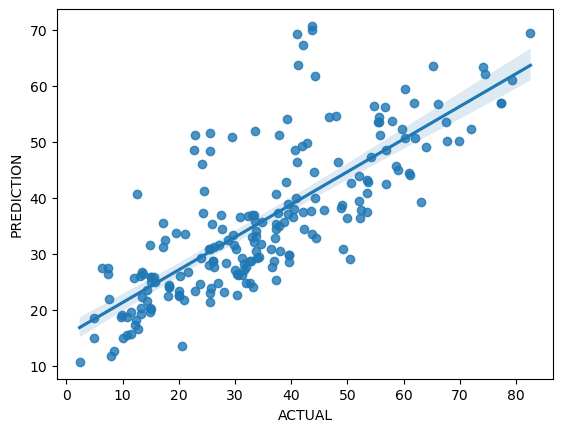

In [43]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.show()

In [44]:
#Evaluating the model

In [45]:
r2_score(y_test, y_pred)

0.601364413277667

In [46]:
#Training score

In [47]:
model.score(x_train, y_train)


0.6169172110840595

In [48]:
#Testing score

In [49]:
model.score(x_test, y_test)

0.601364413277667

In [50]:
mean_squared_error(y_test, y_pred)

122.72694729309544

In [51]:
#Lets choose the other models,RandomForestRegressor()

In [52]:
RFR = RandomForestRegressor()

In [53]:
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [54]:
y_pred_RFR = RFR.predict(x_test)

In [55]:
OUTPUT_RFR = pd.DataFrame(zip(y_test, y_pred_RFR), 
 columns=['ACTUAL', 'PREDICTION'],
 dtype=float)
OUTPUT_RFR.head()


,ACTUAL,PREDICTION
0,48.85,45.455000
1,55.60,44.714000
2,25.46,27.872900
3,24.39,27.044875
4,36.56,33.300500


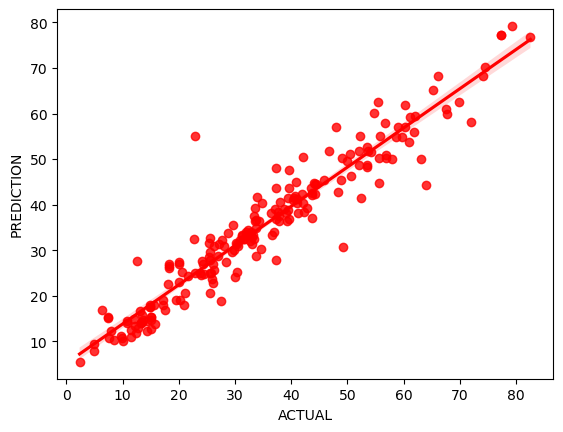

In [56]:
sns.regplot(data=OUTPUT_RFR, x='ACTUAL', y='PREDICTION', color = 'red')
plt.show()

In [57]:
r2_score(y_test, y_pred_RFR)

0.9108263668055561

In [58]:
#Training score

In [59]:
RFR.score(x_train, y_train)

0.9864385004459546

In [60]:
#Testing score


In [61]:
RFR.score(x_test, y_test)

0.9108263668055561

In [62]:
mean_squared_error(y_test, y_pred_RFR)

27.453664814454502

In [63]:
#Lets choose the other models,AdaBoostRegressor()

In [65]:
ABR=AdaBoostRegressor()

In [66]:
ABR.fit(x_train, y_train)

AdaBoostRegressor()

In [67]:
y_pred_ABR = ABR.predict(x_test)

In [68]:
OUTPUT_ABR = pd.DataFrame(zip(y_test, y_pred_ABR), 
 columns=['ACTUAL', 'PREDICTION'],
 dtype=float)
OUTPUT_ABR.head()


,ACTUAL,PREDICTION
0,48.85,35.634129
1,55.60,41.613333
2,25.46,33.793333
3,24.39,30.304437
4,36.56,36.830732


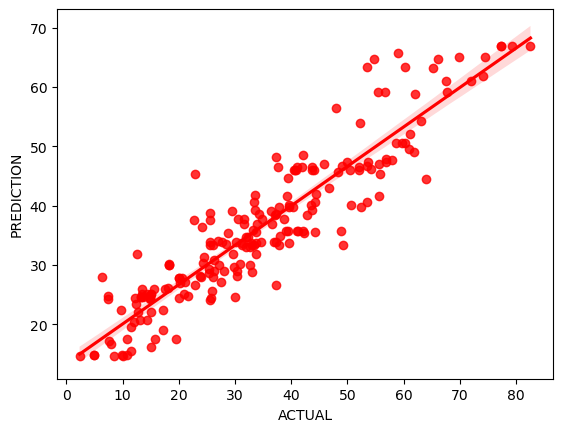

In [69]:
sns.regplot(data=OUTPUT_ABR, x='ACTUAL', y='PREDICTION', color = 'red')
plt.show()

In [70]:
r2_score(y_test, y_pred_ABR)

0.7994907413227674

In [71]:
#Training score

In [72]:
ABR.score(x_train, y_train)

0.8216415497323472

In [73]:
#Testing score

In [74]:
ABR.score(x_test, y_test)

0.7994907413227674

In [75]:
mean_squared_error(y_test, y_pred_RFR)

27.453664814454502

In [76]:
##Complete all the models like above#GradientBoostingRegressor

In [ ]:
#DecisionTreeRegressor